### 텐서

In [1]:
import torch

In [2]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [3]:
def print_tensor(x):
    print(x)
    print("Size:", x.size())
    print("Shape:", x.shape)
    print("랭크(차원):", x.ndimension())    

In [4]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)   # 0번째에 차원에 1이라는 차원값 추가
print_tensor(x)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [5]:
# 랭크 줄이기
x = torch.squeeze(x)    # 크기가 1인 랭크 모두 삭제
print_tensor(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [6]:
# 랭크 조절하기
x = x.view(9)
print_tensor(x)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [7]:
try:
    x = x.view(2, 4)
except Exception as e:
    print(e)  # 에러 출력

shape '[2, 4]' is invalid for input of size 9


### 텐서 연산, 행렬곱

In [8]:
def print_tensor(x):
    print(x)
    print("Size:", x.size())
    #print("Shape:", x.shape)
    print("랭크(차원):", x.ndimension())
    print()

In [9]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print_tensor(w)
print_tensor(x)

tensor([[ 0.3746,  0.6623, -0.4308],
        [-2.5515, -0.1089,  1.6816],
        [-0.7394,  1.7209,  0.3033],
        [ 0.1592, -1.5279, -0.0038],
        [ 0.1266, -0.6293, -0.3479]])
Size: torch.Size([5, 3])
랭크(차원): 2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Size: torch.Size([3, 2])
랭크(차원): 2



In [10]:
b = torch.randn(5,2, dtype=torch.float)
print_tensor(b)

tensor([[ 0.8988,  1.8246],
        [ 0.4640, -2.5074],
        [ 1.0177,  0.3171],
        [ 0.6149, -0.5193],
        [-0.5820, -1.2529]])
Size: torch.Size([5, 2])
랭크(차원): 2



In [11]:
wx = torch.mm(w,x)  # 행렬곱 matrix multiplication
print_tensor(wx)

tensor([[ 0.2074,  0.8135],
        [ 5.5296,  4.5508],
        [ 5.9396,  7.2244],
        [-4.4434, -5.8159],
        [-3.5007, -4.3513]])
Size: torch.Size([5, 2])
랭크(차원): 2



In [12]:
# 행렬곱 형태 맞추기
try:
    torch.mm(b,x)
except Exception as e:
    print(e)

mat1 and mat2 shapes cannot be multiplied (5x2 and 3x2)


In [13]:
result = wx + b
print_tensor(result)

tensor([[ 1.1062,  2.6381],
        [ 5.9936,  2.0434],
        [ 6.9573,  7.5415],
        [-3.8285, -6.3352],
        [-4.0828, -5.6042]])
Size: torch.Size([5, 2])
랭크(차원): 2



### Autograd

In [14]:
w = torch.tensor(1.0, requires_grad=True)

In [15]:
a = w*3

In [16]:
l = a**2

# l = 9w^2

In [17]:
l.backward()
print(f"l을 w로 미분한 값은 {w.grad}")

l을 w로 미분한 값은 18.0


In [18]:
# 오차역전파법 계산해서 grad 값 예상해보자
w = torch.tensor(1.0, requires_grad=True)
a = w*3
b = a + w
c = 8*b
d = c*2

In [19]:
d.backward()
print(w.grad)

tensor(64.)


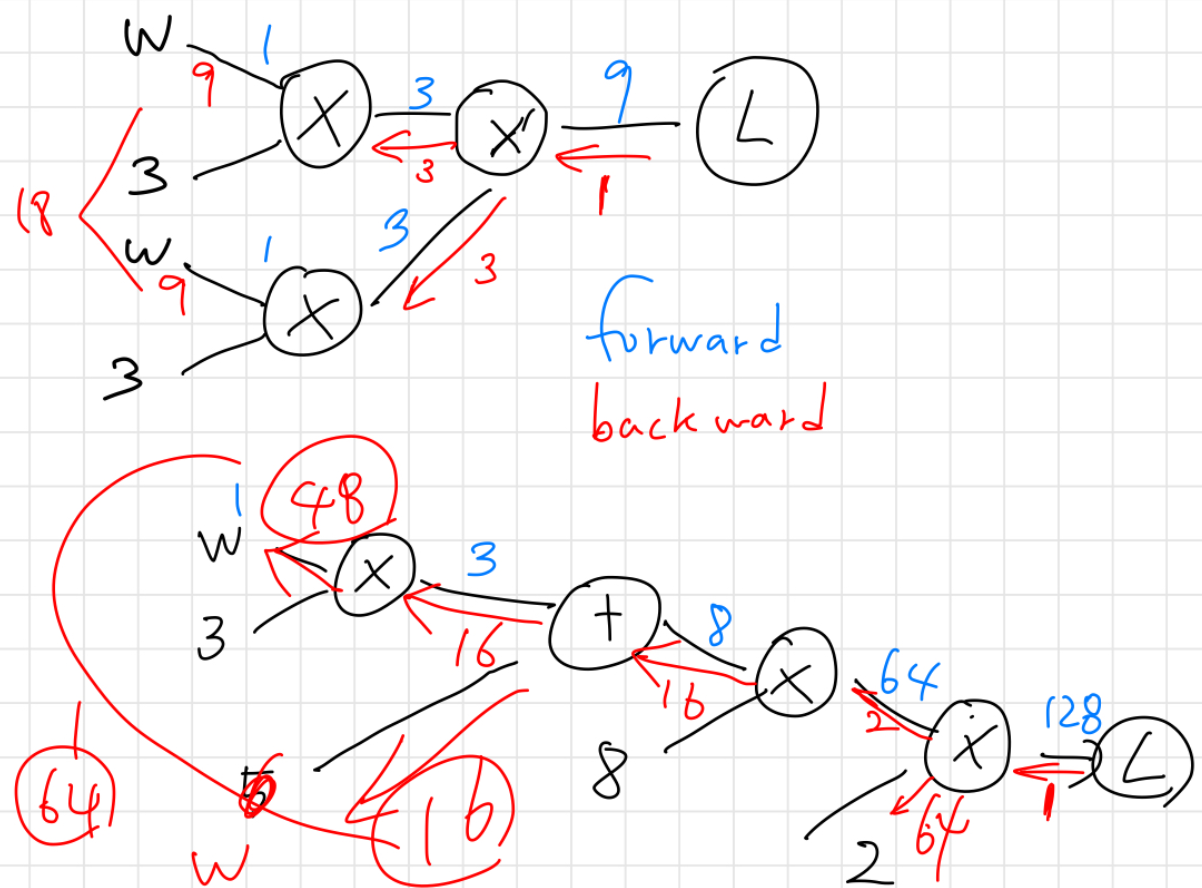

In [20]:
import torch
import pickle
import matplotlib.pyplot as plt

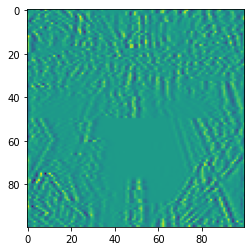

In [21]:
# 오염된 이미지 읽어오기
path = "/content/drive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN"
broken_image = torch.FloatTensor(pickle.load(open(f"{path}/broken_image_t.p", 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))
plt.show()

In [22]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0]*h + filt[2]*h_l + filt[1]*h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [23]:
def distance_loss(hypothesis, broken_image):        # 굳이??????????
    return torch.dist(hypothesis, broken_image)

In [24]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [25]:
lr = 0.8

In [26]:
# 경사하강법 구현
for i in range(20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():   # 직접 구현하기 때문에 자동 기울기 계산 비활성화
        random_tensor = random_tensor - lr*random_tensor.grad   # 경사하강법
    if i % 1000 == 0:
        print(f"Loss at {i} = {loss.item()}")

Loss at 0 = 12.374201774597168
Loss at 1000 = 1.1521821022033691
Loss at 2000 = 0.5417249798774719
Loss at 3000 = 0.37488630414009094
Loss at 4000 = 0.29415443539619446
Loss at 5000 = 0.24475082755088806
Loss at 6000 = 0.20987626910209656
Loss at 7000 = 0.18262243270874023
Loss at 8000 = 0.1597210168838501
Loss at 9000 = 0.1394926756620407
Loss at 10000 = 0.12101248651742935
Loss at 11000 = 0.10373495519161224
Loss at 12000 = 0.0873204842209816
Loss at 13000 = 0.07154936343431473
Loss at 14000 = 0.05627613887190819
Loss at 15000 = 0.04140256717801094
Loss at 16000 = 0.02686298079788685
Loss at 17000 = 0.021159518510103226
Loss at 18000 = 0.021166428923606873
Loss at 19000 = 0.02116764336824417


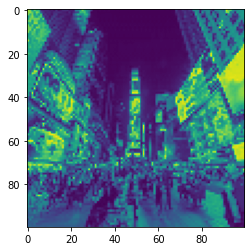

In [27]:
plt.imshow(random_tensor.view(100,100).data)
plt.show()

### 간단한 인공 신경망 구현

In [28]:
import numpy as np
from sklearn.datasets import make_blobs

In [29]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                            shuffle=True, cluster_std=0.3)

In [30]:
def label_map(y_, from_, to_):       # '_'의 의미????????????????
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

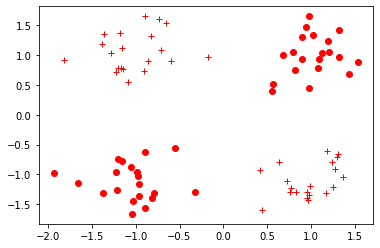

In [31]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y = [None] * len(x)   # else부분 맞추려고 일부러
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [32]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [33]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [34]:
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()  # binary cross entropy loss

epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
model.parameters

<bound method Module.parameters of NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [38]:
model.eval()  # 평가모드
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(f"Before Training, test loss is {test_loss_before.item()}")

Before Training, test loss is 0.6762186288833618


In [42]:
print(model(x_test).size(), y_test.size())

torch.Size([20, 1]) torch.Size([20])


In [50]:
# model train
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print(f"Train loss at {epoch} is {train_loss.item()}")
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6818885207176208
Train loss at 100 is 0.6533811688423157
Train loss at 200 is 0.5948902368545532
Train loss at 300 is 0.510002613067627
Train loss at 400 is 0.42002302408218384
Train loss at 500 is 0.34353989362716675
Train loss at 600 is 0.280894011259079
Train loss at 700 is 0.23445002734661102
Train loss at 800 is 0.19892814755439758
Train loss at 900 is 0.17086488008499146
Train loss at 1000 is 0.14891943335533142
Train loss at 1100 is 0.13128823041915894
Train loss at 1200 is 0.11700866371393204
Train loss at 1300 is 0.10520271211862564
Train loss at 1400 is 0.09532250463962555
Train loss at 1500 is 0.08696896582841873
Train loss at 1600 is 0.07985808700323105
Train loss at 1700 is 0.07379410415887833
Train loss at 1800 is 0.06853993237018585
Train loss at 1900 is 0.06394956260919571


In [53]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print(f"After Training, test loss is {test_loss.item()}")

After Training, test loss is 0.04467403516173363


In [54]:
print(f"Before Training, test loss is {test_loss_before.item()}")
print(f"After Training, test loss is {test_loss.item()}")

Before Training, test loss is 0.6762186288833618
After Training, test loss is 0.04467403516173363


In [60]:
torch.save(model.state_dict(), './model.pt')    # 모델 저장
print(f"state_dict format of the model: {model.state_dict()}")

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 2.0779,  1.0042],
        [ 0.5071, -0.0038],
        [ 0.1026,  0.1002],
        [ 1.5984, -1.5376],
        [-1.0876, -1.9360]])), ('linear_1.bias', tensor([-0.1024, -0.6567, -0.4617, -0.2884, -0.0394])), ('linear_2.weight', tensor([[-2.2056, -0.1216, -0.0910,  2.1365, -2.1219]])), ('linear_2.bias', tensor([1.9412]))])


In [61]:
model.state_dict()

OrderedDict([('linear_1.weight', tensor([[ 2.0779,  1.0042],
                      [ 0.5071, -0.0038],
                      [ 0.1026,  0.1002],
                      [ 1.5984, -1.5376],
                      [-1.0876, -1.9360]])),
             ('linear_1.bias',
              tensor([-0.1024, -0.6567, -0.4617, -0.2884, -0.0394])),
             ('linear_2.weight',
              tensor([[-2.2056, -0.1216, -0.0910,  2.1365, -2.1219]])),
             ('linear_2.bias', tensor([1.9412]))])

In [62]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt')) # 모델 불러오기

<All keys matched successfully>

In [68]:
new_model.state_dict()

OrderedDict([('linear_1.weight', tensor([[ 2.0779,  1.0042],
                      [ 0.5071, -0.0038],
                      [ 0.1026,  0.1002],
                      [ 1.5984, -1.5376],
                      [-1.0876, -1.9360]])),
             ('linear_1.bias',
              tensor([-0.1024, -0.6567, -0.4617, -0.2884, -0.0394])),
             ('linear_2.weight',
              tensor([[-2.2056, -0.1216, -0.0910,  2.1365, -2.1219]])),
             ('linear_2.bias', tensor([1.9412]))])

In [69]:
new_model.eval()
print(f"벡터 [-1, 1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}")

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.8744879364967346


In [70]:
new_model(torch.FloatTensor([-1,1]))

tensor([0.8745], grad_fn=<SigmoidBackward0>)